In [242]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import sklearn.linear_model as linear_model
from sklearn.linear_model import Lasso
from scipy import stats
from xgboost import XGBRegressor # 부스팅-XGBoost회귀
from lightgbm import LGBMRegressor # 부스팅-LightGBM 회귀
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score
import warnings         # warnings : 버전 충돌 및 특정 예외 처리를 위해 불러온 내장 모듈
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [243]:
import sklearn.metrics as metrics

In [244]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# < 영화평점 결정요인 탐색 >

## 1. EDA 

In [118]:
train = pd.read_csv("./movie_metadata.csv")

In [119]:
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 독립변수, 종속변수 정리

- Feature(X, 독립 변수)

    1. movie_title : Title of the Movie
    1. duration : Duration in minutes
    1. director_name : Name of the Director of the Movie
    1. director_facebook_likes : Number of likes of the Director on his Facebook Page
    1. actor_1_name : Primary actor starring in the movie
    1. actor_1_facebook_likes : Number of likes of the Actor_1 on his/her Facebook Page
    1. actor_2_name : Other actor starring in the movie
    1. actor_2_facebook_likes : Number of likes of the Actor_2 on his/her Facebook Page
    1. actor_3_name : Other actor starring in the movie
    1. actor_3_facebook_likes : Number of likes of the Actor_3 on his/her Facebook Page
    1. num_user_for_reviews : Number of users who gave a review
    1. num_critic_for_reviews : Number of critical reviews on imdb
    1. num_voted_users : Number of people who voted for the movie
    1. cast_total_facebook_likes : Total number of facebook likes of the entire cast of the movie
    1. movie_facebook_likes : Number of Facebook likes in the movie page
    1. plot_keywords : Keywords describing the movie plot
    1. facenumber_in_poster : Number of the actor who featured in the movie poster
    1. color : Film colorization. ‘Black and White’ or ‘Color’
    
    1. genres : Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
    
    1. title_year : The year in which the movie is released (1916:2016)
    1. language : English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
    1. country : Country where the movie is produced
    1. content_rating : Content rating of the movie
    1. aspect_ratio : Aspect ratio the movie was made in
    1. movie_imdb_link : IMDB link of the movie
    1. gross : Gross earnings of the movie in Dollars
    1. budget : Budget of the movie in Dollars

    

- Target

    1. imdb_score : IMDB Score of the movie on IMDB
    1.  평점 구간별 영화평가
        - 1-3	Flop Movie
        - 3-6	Average Movie
        - 6-10	Hit Movie

In [120]:
train.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [122]:
train['imdb_score'].unique()

array([7.9, 7.1, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5,
       7.2, 8.1, 7. , 7.7, 8.2, 5.9, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. ,
       8.4, 5.8, 5.4, 9. , 4.8, 5.2, 7.6, 4.5, 5.5, 8.6, 8.8, 5.1, 7.4,
       4.2, 5. , 4.9, 3.7, 5.3, 4.3, 3.8, 4.4, 3.3, 2.2, 8.9, 8.7, 4.6,
       2.4, 3.4, 4.1, 4.7, 3. , 3.6, 3.5, 2.7, 1.7, 4. , 2. , 9.3, 2.9,
       3.9, 2.8, 2.3, 1.9, 3.1, 9.5, 9.1, 1.6, 2.5, 2.1, 3.2, 9.2, 2.6])

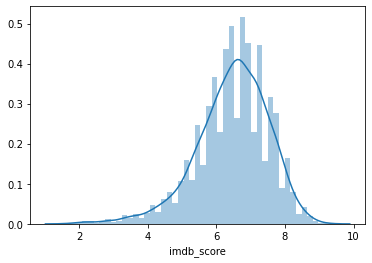

In [232]:
# 적절한 정규분포모형을 따르므로 별도의 scaling 필요x

sns.distplot(train['imdb_score']);

In [124]:
# 28개의 변수와 5043개의 데이터

train.shape

(5043, 28)

In [125]:
# 수치형 데이터 확인 ( 기술통계량값 출력으로 )

train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [126]:
# 범주형 데이터 확인 

train.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,King Kong,John Heard,based on novel,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


## 2. 데이터 전환

### 2-1. 결측치 확인

In [127]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:50]
missing_data = pd.DataFrame({'Missing Value Ratio' :train_na})
missing_data.head(50)

,Missing Value Ratio
gross,17.529248
budget,9.756098
aspect_ratio,6.523895
content_rating,6.008328
plot_keywords,3.033908
title_year,2.141582
director_name,2.062265
director_facebook_likes,2.062265
num_critic_for_reviews,0.991473
actor_3_facebook_likes,0.456078


Text(0.5, 1.0, 'Ratio of missing values')

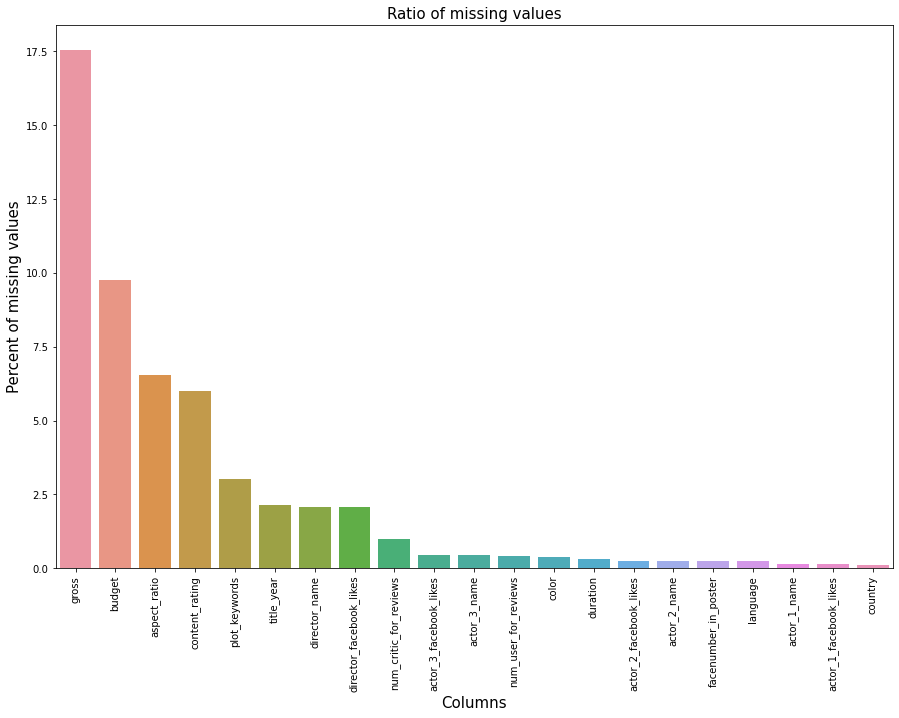

In [128]:
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Ratio of missing values', fontsize=15)

In [129]:
train.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

### 2-2. 결측치 전처리

In [130]:
# gross 변수의 결측치가 너무 많음.
# 대체값을 찾기 어려움.
# 따라서 해당값이 결측치인 데이터 삭제.

train.dropna(axis = 0, subset = ['gross'], inplace = True)
train.gross.isnull().sum()

0

In [131]:
# budget 변수의 결측치가 너무 많음.
# 대체값을 찾기 어려움.
# 따라서 해당값이 결측치인 데이터 삭제.

train.dropna(axis = 0, subset = ['budget'], inplace = True)
train.gross.isnull().sum()

0

In [132]:
# 5043 -> 3891 로 약 23% 데이터손실. 그러나 3891개의 데이터가 여전히 존재하므로 문제x

train.shape

(3891, 28)

In [133]:
# 기타 등장배우가 결측치인 데이터 삭제.

train.dropna(axis = 0, subset = ['actor_3_name'], inplace = True)
train.actor_3_name.isnull().sum()

0

In [134]:
# facenumber_in_poster 변수의 중앙값을 대체값으로 지정하여 전처리.

facenumber_in_poster_median = train.facenumber_in_poster.median()
train.facenumber_in_poster.fillna(facenumber_in_poster_median, inplace = True)
train.facenumber_in_poster.isnull().sum()

0

In [135]:
train.plot_keywords.unique()

array(['avatar|future|marine|native|paraplegic',
       'goddess|marriage ceremony|marriage proposal|pirate|singapore',
       'bomb|espionage|sequel|spy|terrorist', ...,
       'assassin|death|guitar|gun|mariachi',
       'written and directed by cast member',
       'actress name in title|crush|date|four word title|video camera'],
      dtype=object)

In [136]:
# plot_keywords 변수의 결측치 데이터 삭제

train.dropna(axis = 0, subset = ['plot_keywords'], inplace = True)
train.plot_keywords.isnull().sum()

0

In [137]:
train.language.value_counts()

English       3671
French          37
Spanish         24
Mandarin        15
Japanese        12
German          12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Danish           3
Dutch            3
Thai             3
Dari             2
Hebrew           2
Aboriginal       2
Indonesian       2
Romanian         1
Zulu             1
Mongolian        1
Hungarian        1
Maya             1
Aramaic          1
Swedish          1
Arabic           1
Vietnamese       1
Dzongkha         1
None             1
Icelandic        1
Kazakh           1
Filipino         1
Telugu           1
Russian          1
Czech            1
Bosnian          1
Name: language, dtype: int64

In [138]:
# 가장 높은 빈도인 English 로 결측치 대체

train.language.fillna('English', inplace = True)
train.language.isnull().sum()

0

In [139]:
train.language.value_counts()

English       3674
French          37
Spanish         24
Mandarin        15
Japanese        12
German          12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Danish           3
Dutch            3
Thai             3
Dari             2
Hebrew           2
Aboriginal       2
Indonesian       2
Romanian         1
Zulu             1
Mongolian        1
Hungarian        1
Maya             1
Aramaic          1
Swedish          1
Arabic           1
Vietnamese       1
Dzongkha         1
None             1
Icelandic        1
Kazakh           1
Filipino         1
Telugu           1
Russian          1
Czech            1
Bosnian          1
Name: language, dtype: int64

In [140]:
train.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', nan, 'X',
       'Not Rated', 'Unrated', 'M', 'GP', 'Passed'], dtype=object)

In [141]:
# Not Rated 로 결측치 대체.

train.content_rating.fillna('Not Rated', inplace = True)
train.content_rating.isnull().sum()

0

In [142]:
train.color.value_counts()

Color               3718
 Black and White     131
Name: color, dtype: int64

In [143]:
# 빈도수 높은 Color로 결측치 대체

train.color.fillna('Color', inplace = True)
train.color.isnull().sum()

0

In [144]:
train.color.value_counts()

Color               3720
 Black and White     131
Name: color, dtype: int64

In [145]:
train.isna().sum()

color                         0
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          0
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          0
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 61
movie_facebook_likes          0
dtype: int64

In [146]:
train["aspect_ratio"].value_counts()

2.35     2001
1.85     1607
1.37       48
1.66       40
1.78       36
1.33       19
2.39       11
2.20       11
2.40        3
2.76        3
2.00        3
1.75        2
2.24        1
1.18        1
2.55        1
1.77        1
16.00       1
1.50        1
Name: aspect_ratio, dtype: int64

#### aspect_ratio 값이 2.35 일 때, 1.85 일 때의 영화평점

In [147]:
# 가장 빈도수가 높은 2.35, 1.85 일때 imdb_score의 차이가 각 각 6.50, 6.37 으로 큰 차이가 없음.

train.groupby(['aspect_ratio'], as_index = False).imdb_score.mean()

,aspect_ratio,imdb_score
0,1.18,8.500000
1,1.33,6.431579
2,1.37,6.902083
3,1.50,7.100000
4,1.66,7.075000
5,1.75,7.700000
6,1.77,6.300000
7,1.78,6.341667
8,1.85,6.375109
9,2.00,6.433333


In [148]:
# 따라서 해당 변수는 영화평점에 유의미한 변수가 아니므로 삭제.

train.drop("aspect_ratio", axis = 1, inplace = True)
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


### 모든 결측치 제거 완료

In [149]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:50]
missing_data = pd.DataFrame({'Missing Value Ratio' :train_na})
missing_data.head(50)

,Missing Value Ratio


In [150]:
# 최종적으로 데이터 수 5043 -> 3851 로 약 24% 데이터 손실. 그러나 모델링을 위한 확보된 데이터 수는 충분.

train.shape

(3851, 27)

## 3. 변수별 시각화

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

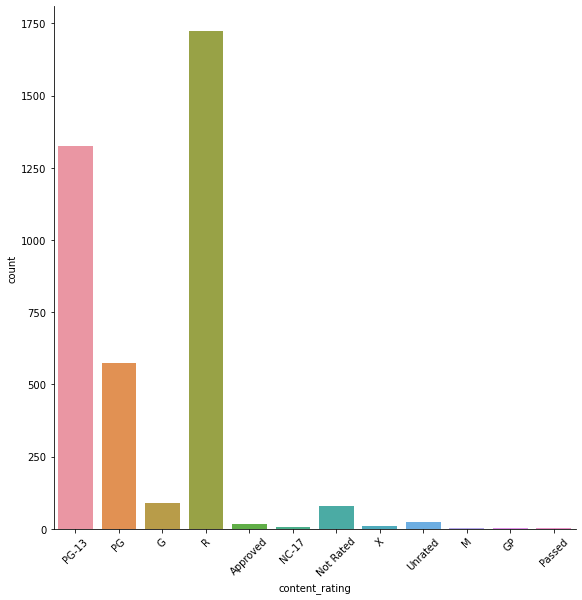

In [151]:
# content_rating 의 계급별 빈도수 확인

sns.catplot('content_rating', kind = 'count', data = train, height = 8)
plt.xticks(rotation = 45)

In [152]:
# 영화평점 최소값, 최대값

train['imdb_score'].min(), train['imdb_score'].max()

(1.6, 9.3)

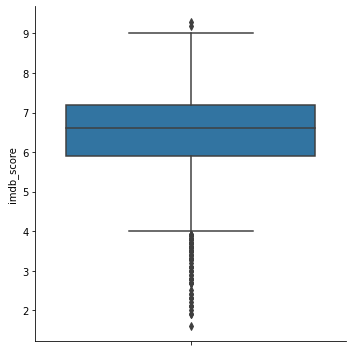

In [153]:
# 영화평점 box plot, 평점 6~7 사이의 빈도가 가장 높다.

sns.catplot(y = 'imdb_score', kind = 'box', data = train)

In [154]:
# 영화평점을 정수로 만들어 시각화하기 수월하게 만듬.(복사본 만들어서 원본훼손방지)

df = train.copy()
df['imdb_score'] = df['imdb_score'].apply(lambda x : int(round(x)))

In [155]:
df['imdb_score'].value_counts()

6    1320
7    1302
8     619
5     397
4     138
3      33
9      28
2      14
Name: imdb_score, dtype: int64

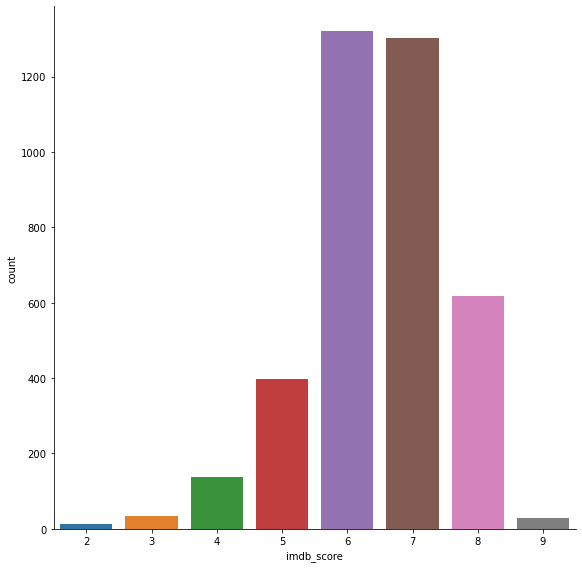

In [156]:
# 반올림된 영화평점에 대한 빈도수 시각화

sns.catplot('imdb_score', kind = 'count', data = df, height = 8)

In [157]:
# 빈도수 3이하는 삭제필요

mv_tmp = df['language'].value_counts()
mv_tmp

English       3674
French          37
Spanish         24
Mandarin        15
Japanese        12
German          12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Danish           3
Dutch            3
Thai             3
Dari             2
Hebrew           2
Aboriginal       2
Indonesian       2
Romanian         1
Zulu             1
Mongolian        1
Hungarian        1
Maya             1
Aramaic          1
Swedish          1
Arabic           1
Vietnamese       1
Dzongkha         1
None             1
Icelandic        1
Kazakh           1
Filipino         1
Telugu           1
Russian          1
Czech            1
Bosnian          1
Name: language, dtype: int64

In [158]:
# 빈도수가 3이상인 언어만 할당

mv_tmp = df['language'].value_counts()
language_list = mv_tmp[mv_tmp > 3].index.tolist()
language_list

['English',
 'French',
 'Spanish',
 'Mandarin',
 'Japanese',
 'German',
 'Hindi',
 'Cantonese',
 'Italian',
 'Portuguese',
 'Korean',
 'Norwegian']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

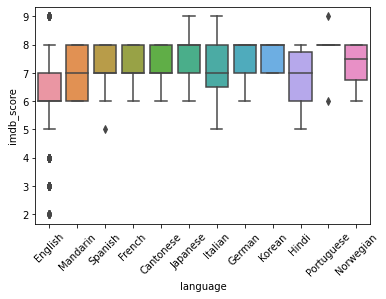

In [159]:
# 국가별 영화평점 현황

sns.boxplot(y = 'imdb_score', x = 'language', data = df[df['language'].isin(language_list)])
plt.xticks(rotation = 45)

In [160]:
# 년도별 개봉현황, 영화평점을 보기위해 년도를 정수화.

df_year = df[['title_year', 'imdb_score']]
df_year = df_year.dropna()
df_year['title_year'] = df_year['title_year'].astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 <a list of 75 Text major ticklabel objects>)

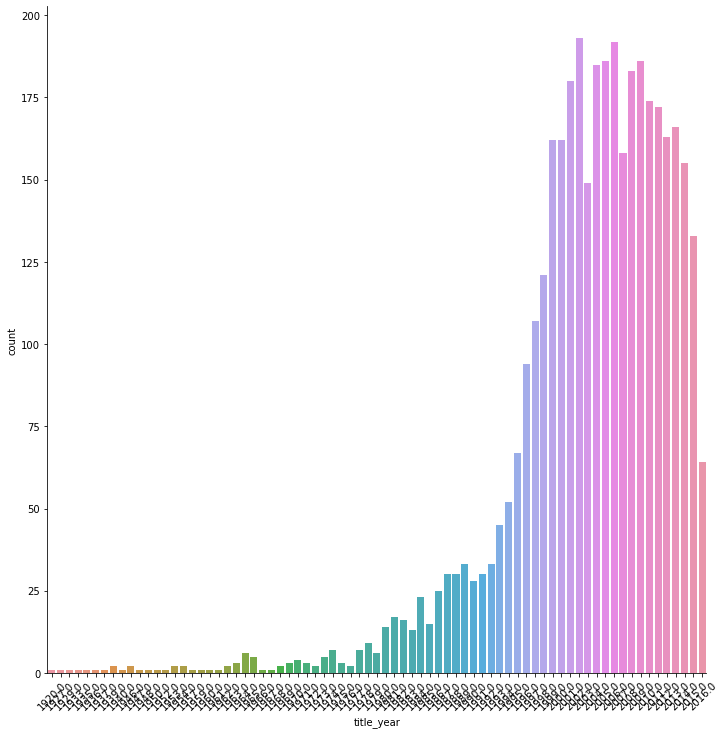

In [161]:
# 2000년대부터 개봉되는 영화수가 급격히 증가하다가 2016년 감소

sns.catplot('title_year', data = df, kind = 'count', height = 10)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 <a list of 75 Text major ticklabel objects>)

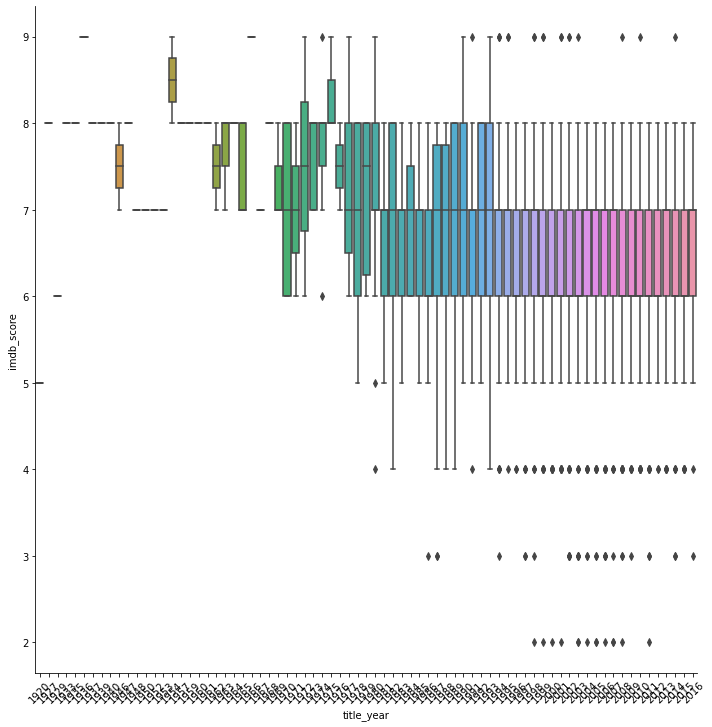

In [162]:
# 년도가 올라갈수록 낮은 평점의 영화빈도가 증가하고, 6~7점대로 평점이 낮아짐.

sns.catplot(y = 'imdb_score', x = 'title_year', data = df_year, kind = 'box', height = 10)
plt.xticks(rotation = 45)

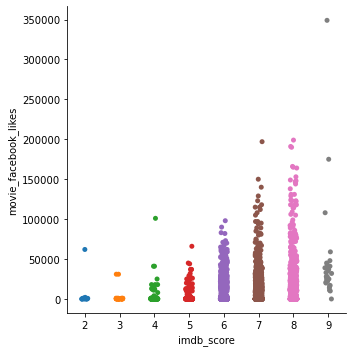

In [163]:
# 'facebook_좋아요' 수가 높을수록 대체로 영화평점이 높지만 9점대 영화는 그렇지 않다. 

sns.catplot(y = 'movie_facebook_likes', x = 'imdb_score', data = df)

In [164]:
# 두 변수간 상관계수는 약 0.267

df[['imdb_score', 'movie_facebook_likes']].corr()

,imdb_score,movie_facebook_likes
imdb_score,1.000000,0.266985
movie_facebook_likes,0.266985,1.000000


# 4. 데이터 전처리

### 범주형, 연속형 변수 구분하기

In [165]:
columns = df.columns

In [166]:
discrete = []
continuous = []

for i in columns:
    if df[i].dtype == 'object':
        discrete.append(i)
    else:
        continuous.append(i)

In [167]:
# 연속형 변수들의 상관계수 저장.

df_corr = df[continuous].corr()

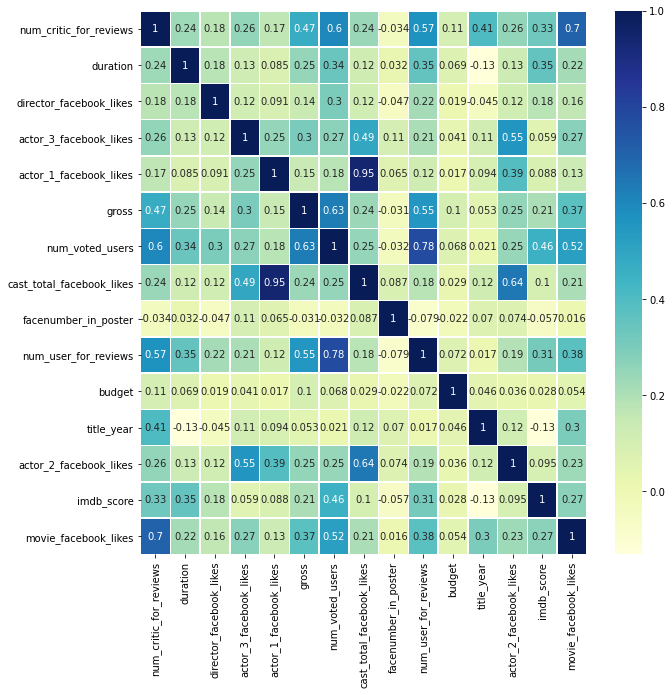

In [168]:
# 히트맵으로 상관계수 표현

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_corr,
            cmap = 'YlGnBu',
            xticklabels = df_corr.columns.values,
           yticklabels = df_corr.columns.values,
           annot = True, linewidths = .5, ax = ax)


### imdb_score와 상관관계가 높은 변수

- 변수와 상관계수값

    1. Number of Critic for reviews : 0.33
    1. duration : 0.35
    1. Gross : 0.21
    1. num_voted_users : 0.46
    1. num_user_for_reviews : 0.31

## 4-1. 영화감독과 영화평점의 상관유무

In [169]:
len(df['director_name'].unique())

1723

In [170]:
# 감독별 영화평점의 상관계수를 보기위해 원핫 인코딩을 활용하여 더미변수 생성

tmp_x = pd.get_dummies(df['director_name'])
tmp_x['imdb_score'] = df['imdb_score']

In [171]:
df_director_corr = tmp_x.corr()

In [172]:
# 영화평점과 상관계수 0.05 이상인 감독만 출력

corr = df_director_corr['imdb_score']
corr[corr > 0.05]

Alejandro G. Iñárritu    0.050255
Christopher Nolan        0.073960
David Fincher            0.066481
Hayao Miyazaki           0.052270
James Cameron            0.053938
Martin Scorsese          0.071684
Peter Jackson            0.065223
Quentin Tarantino        0.068777
Steven Spielberg         0.077405
imdb_score               1.000000
Name: imdb_score, dtype: float64

In [173]:
director_name_list = corr[corr > 0.05].index.tolist()

In [174]:
director_name_list

['Alejandro G. Iñárritu',
 'Christopher Nolan',
 'David Fincher',
 'Hayao Miyazaki',
 'James Cameron',
 'Martin Scorsese',
 'Peter Jackson',
 'Quentin Tarantino',
 'Steven Spielberg',
 'imdb_score']

In [175]:
director_name_list_worst = tmp_x.drop(director_name_list, axis = 1)

In [176]:
tmp_x.columns

Index(['Aaron Schneider', 'Aaron Seltzer', 'Abel Ferrara', 'Adam Carolla',
       'Adam Goldberg', 'Adam Marcus', 'Adam McKay', 'Adam Rapp',
       'Adam Rifkin', 'Adam Shankman',
       ...
       'Yash Chopra', 'Yimou Zhang', 'Zach Braff', 'Zach Cregger',
       'Zack Snyder', 'Zak Penn', 'Zal Batmanglij', 'Álex de la Iglesia',
       'Émile Gaudreault', 'imdb_score'],
      dtype='object', length=1724)

In [177]:
director_name_list_worst

,Aaron Schneider,Aaron Seltzer,Abel Ferrara,Adam Carolla,Adam Goldberg,Adam Marcus,Adam McKay,Adam Rapp,Adam Rifkin,Adam Shankman,Adrian Lyne,Adrienne Shelly,Agnieszka Holland,Agnieszka Wojtowicz-Vosloo,Aki Kaurismäki,Akira Kurosawa,Akiva Goldsman,Akiva Schaffer,Alan Cohn,Alan J. Pakula,Alan Metter,Alan Parker,Alan Poul,Alan Rudolph,Alan Shapiro,Alan Taylor,Albert Brooks,Albert Hughes,Alejandro Agresti,Alejandro Amenábar,Alejandro Monteverde,Alessandro Carloni,Alex Craig Mann,Alex Garland,Alex Gibney,Alex Kendrick,Alex Proyas,Alex Rivera,Alex Smith,Alex Zamm,Alexander Payne,Alexander Witt,Alexandre Aja,Alfonso Cuarón,Alfred Hitchcock,Alison Maclean,Alister Grierson,Allen Coulter,Allen Hughes,Allison Anders,...,Vincent Ward,Vincente Minnelli,Vincenzo Natali,Vivek Agnihotri,Vondie Curtis-Hall,Wallace Wolodarsky,Wally Pfister,Walt Becker,Walter Hill,Walter Salles,Warren Beatty,Wayne Beach,Wayne Kramer,Wayne Wang,Werner Herzog,Wes Anderson,Wes Ball,Wes Craven,Whit Stillman,Wil Shriner,Will Finn,Will Gluck,Willard Huyck,William A. Fraker,William A. Graham,William Brent Bell,William Cottrell,William Dear,William Friedkin,William H. Macy,William Malone,William Shatner,William Wyler,Wilson Yip,Wolfgang Becker,Wolfgang Petersen,Woody Allen,Wych Kaosayananda,Xavier Beauvois,Xavier Gens,Yarrow Cheney,Yash Chopra,Yimou Zhang,Zach Braff,Zach Cregger,Zack Snyder,Zak Penn,Zal Batmanglij,Álex de la Iglesia,Émile Gaudreault
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
tmp_x_best = tmp_x.drop(director_name_list_worst, axis = 1)

In [179]:
tmp_x_best.drop('imdb_score', axis = 1, inplace = True)

In [180]:
# 상관계수가 0.077, 0.068인 'Steven Spielberg', 'Quentin Tarantino' 감독의 영화와 평점

# Steven Spielberg

df[df['director_name'] == 'Steven Spielberg'][['imdb_score','movie_title']]

,imdb_score,movie_title
54,6,Indiana Jones and the Kingdom of the Crystal S...
178,7,The BFG
189,6,War of the Worlds
194,7,The Adventures of Tintin
284,8,Minority Report
373,7,A.I. Artificial Intelligence
523,6,The Lost World: Jurassic Park
536,7,The Terminal
545,8,Munich
589,7,Hook


In [181]:
# Quentin Tarantino

df[df['director_name'] == 'Quentin Tarantino'][['imdb_score','movie_title']]

,imdb_score,movie_title
296,8,Django Unchained
588,8,Inglourious Basterds
706,8,The Hateful Eight
855,8,Kill Bill: Vol. 1
858,8,Kill Bill: Vol. 2
2930,8,Jackie Brown
3355,9,Pulp Fiction
4496,8,Reservoir Dogs


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

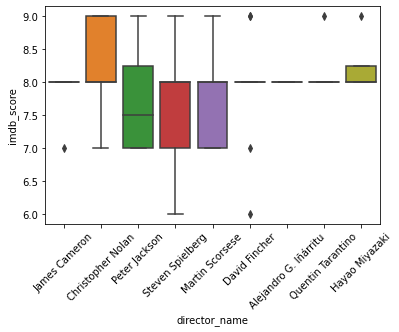

In [182]:
# 감독별 영화평점 box plot

df['director_name'] = df['director_name'].astype(object)
sns.boxplot(y = 'imdb_score', x = 'director_name', data = df[df['director_name'].isin(director_name_list)])
plt.xticks(rotation = 45)

## 4-2. 장르와 평점과의 관계

In [183]:
# 영화 장르와 평점과의 관계

genre_list = df['genres'].str.split('|')
genre_list[:5]

0    [Action, Adventure, Fantasy, Sci-Fi]
1            [Action, Adventure, Fantasy]
2           [Action, Adventure, Thriller]
3                      [Action, Thriller]
5             [Action, Adventure, Sci-Fi]
Name: genres, dtype: object

In [184]:
genre_df = pd.DataFrame()
print(genre_df)

Empty DataFrame
Columns: []
Index: []


In [185]:
genre_df = genre_list.apply(pd.Series)

In [186]:
genre_df.head()

,0,1,2,3,4,5,6,7
0,Action,Adventure,Fantasy,Sci-Fi,NaN,NaN,NaN,NaN
1,Action,Adventure,Fantasy,NaN,NaN,NaN,NaN,NaN
2,Action,Adventure,Thriller,NaN,NaN,NaN,NaN,NaN
3,Action,Thriller,NaN,NaN,NaN,NaN,NaN,NaN
5,Action,Adventure,Sci-Fi,NaN,NaN,NaN,NaN,NaN


In [187]:
# 장르별 영화평점의 상관계수를 보기위해 원핫 인코딩을 활용하여 더미변수 생성

pd.get_dummies(genre_df.stack()).groupby(level = 0).max().head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [188]:
# 여전히 변수의 타입이 object 이므로 정수형으로 바꿔주는 작업필요

genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3851 non-null   object
 1   1       3482 non-null   object
 2   2       2469 non-null   object
 3   3       1173 non-null   object
 4   4       381 non-null    object
 5   5       80 non-null     object
 6   6       20 non-null     object
 7   7       3 non-null      object
dtypes: object(8)
memory usage: 430.8+ KB


In [189]:
genre_df.apply(pd.value_counts, 1).fillna(0).astype(int).head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [190]:
genre_df = genre_df.stack().groupby(level = 0).value_counts().unstack(fill_value = 0)

In [191]:
# 숫자형으로 전환 완료

genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 5042
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Action       3851 non-null   int64
 1   Adventure    3851 non-null   int64
 2   Animation    3851 non-null   int64
 3   Biography    3851 non-null   int64
 4   Comedy       3851 non-null   int64
 5   Crime        3851 non-null   int64
 6   Documentary  3851 non-null   int64
 7   Drama        3851 non-null   int64
 8   Family       3851 non-null   int64
 9   Fantasy      3851 non-null   int64
 10  Film-Noir    3851 non-null   int64
 11  History      3851 non-null   int64
 12  Horror       3851 non-null   int64
 13  Music        3851 non-null   int64
 14  Musical      3851 non-null   int64
 15  Mystery      3851 non-null   int64
 16  Romance      3851 non-null   int64
 17  Sci-Fi       3851 non-null   int64
 18  Short        3851 non-null   int64
 19  Sport        3851 non-null   int64
 20  Thriller

In [192]:
genre_df['imdb_score'] = df['imdb_score']

In [193]:
genre_corr = genre_df.corr()
genre_corr = genre_corr['imdb_score']

In [194]:
# 상관계수의 절대값이 0.1 이상인 것만 추출하여 영화평점에 Possitive, negative인 장르 추출

genre_corr[abs(genre_corr) > 0.1]

Biography     0.165456
Comedy       -0.209860
Drama         0.300817
History       0.133460
Horror       -0.161548
War           0.108642
imdb_score    1.000000
Name: imdb_score, dtype: float64

### imdb_score와 상관관계 (> 0.1) 있는 장르

- Possitive

    1. Drama : 0.300
    1. Biography : 0.165
    1. History : 0.133
    1. War : 0.108
---
- Negative
    
    1. Comedy : -0.209
    1. Horror : -0.161

In [195]:
train['imdb_score']

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5033    7.0
5034    6.3
5035    6.9
5037    6.4
5042    6.6
Name: imdb_score, Length: 3851, dtype: float64

In [196]:
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


In [197]:
train.drop(['facenumber_in_poster','plot_keywords','movie_imdb_link'], axis = 1, inplace = True)

In [198]:
genre_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,imdb_score
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,8
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,7
5034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6
5035,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,7
5037,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [199]:
genre_df.drop('imdb_score', axis = 1, inplace = True)

In [200]:
train = pd.concat([train, genre_df], axis = 1)

In [201]:
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [202]:
train = pd.concat([train, tmp_x_best], axis = 1)

In [203]:
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Alejandro G. Iñárritu,Christopher Nolan,David Fincher,Hayao Miyazaki,James Cameron,Martin Scorsese,Peter Jackson,Quentin Tarantino,Steven Spielberg
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4-3. 주연배우와 평점과의 관계

In [204]:
train['actor_1_name'].value_counts()

Robert De Niro       42
Johnny Depp          39
Nicolas Cage         31
J.K. Simmons         31
Denzel Washington    30
                     ..
John Cothran          1
Dyan Cannon           1
Glen Hansard          1
Lane Smith            1
Karen Allen           1
Name: actor_1_name, Length: 1485, dtype: int64

In [205]:
# 주연배우별 영화평점의 상관계수를 보기위해 원핫 인코딩을 활용하여 더미변수 생성

tmp_x2 = pd.get_dummies(df['actor_1_name'])
tmp_x2['imdb_score'] = df['imdb_score']

In [206]:
df_actor_corr = tmp_x2.corr()

In [207]:
# 영화평점과 상관계수 0.05 이상인 감독만 출력

corr = df_actor_corr['imdb_score']
corr[corr > 0.05]

Christian Bale            0.055549
Denzel Washington         0.056394
Leonardo DiCaprio         0.067957
Philip Seymour Hoffman    0.050534
Tom Hanks                 0.074391
imdb_score                1.000000
Name: imdb_score, dtype: float64

In [208]:
actor_name_list = corr[corr > 0.05].index.tolist()

In [209]:
actor_name_list

['Christian Bale',
 'Denzel Washington',
 'Leonardo DiCaprio',
 'Philip Seymour Hoffman',
 'Tom Hanks',
 'imdb_score']

In [210]:
actor_name_list_worst = tmp_x2.drop(actor_name_list, axis = 1)

In [211]:
tmp_x2.columns

Index(['50 Cent', 'Aaliyah', 'Aasif Mandvi', 'Abbie Cornish',
       'Abhishek Bachchan', 'Adam Arkin', 'Adam Baldwin', 'Adam Garcia',
       'Adam Goldberg', 'Adam LeFevre',
       ...
       'Yuri Lowenthal', 'Zach Gilford', 'Zachary Gordon', 'Zack Ward',
       'Zak Penn', 'Zoe Kazan', 'Zooey Deschanel', 'Zoë Kravitz',
       'Óscar Jaenada', 'imdb_score'],
      dtype='object', length=1486)

In [212]:
actor_name_list_worst

,50 Cent,Aaliyah,Aasif Mandvi,Abbie Cornish,Abhishek Bachchan,Adam Arkin,Adam Baldwin,Adam Garcia,Adam Goldberg,Adam LeFevre,Adam Sandler,Adam Scott,Adrian Martinez,Adriana Barraza,Adriana Caselotti,Ahna O'Reilly,Aidan Quinn,Aidan Turner,Aimee Garcia,Aisha Tyler,Aksel Hennie,Al Pacino,Alan Rickman,Alan Ruck,Alanna Ubach,Albert Brooks,Albert Finney,Alden Ehrenreich,Aldis Hodge,Alessandro Nivola,Alex Gibney,Alex Huszar,Alex Kendrick,Alex Pettyfer,Alex Rocco,Alex Veadov,Alexa PenaVega,Alexander Gould,Alexander Skarsgård,Alexia Fast,Alexis Arquette,Alexis Dziena,Alfre Woodard,Alia Shawkat,Alice Braga,Alice Greczyn,Alice Krige,Alice Olivia Clarke,Alicia Goranson,Alicia Witt,...,Violante Placido,Virginia Madsen,Vivica A. Fox,W. Earl Brown,Wagner Moura,Walter Koenig,Wanda Sykes,Warren Beatty,Warren Christie,Wayne Knight,Wei Zhao,Wendi McLendon-Covey,Wes Studi,Wesley Jonathan,Wilford Brimley,Will Ferrell,Will Forte,Will Patton,Will Smith,William Baldwin,William Gates,William Holden,William Hootkins,William Hurt,William Joseph Elk III,William McNamara,William Morgan Sheppard,William Schallert,William Smith,Willie Garson,Wood Harris,Woody Allen,Woody Strode,Xander Berkeley,Ximena Ayala,Yaphet Kotto,Yasmine Al Massri,Yaya DaCosta,Ye Liu,Yorick van Wageningen,Yuki Matsuzaki,Yuri Lowenthal,Zach Gilford,Zachary Gordon,Zack Ward,Zak Penn,Zoe Kazan,Zooey Deschanel,Zoë Kravitz,Óscar Jaenada
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
tmp_x2_best = tmp_x2.drop(actor_name_list_worst, axis = 1)

In [214]:
tmp_x2_best.drop('imdb_score', axis = 1, inplace = True)

In [215]:
train = pd.concat([train, tmp_x2_best], axis = 1)

In [216]:
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Alejandro G. Iñárritu,Christopher Nolan,David Fincher,Hayao Miyazaki,James Cameron,Martin Scorsese,Peter Jackson,Quentin Tarantino,Steven Spielberg,Christian Bale,Denzel Washington,Leonardo DiCaprio,Philip Seymour Hoffman,Tom Hanks
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4-4. 기타 범주형변수 더미로 만들기

In [217]:
train['language'].unique()

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Telugu', 'Cantonese', 'Japanese',
       'Aramaic', 'Italian', 'Dutch', 'Dari', 'German', 'Mongolian',
       'Thai', 'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Icelandic',
       'Danish', 'Portuguese', 'Norwegian', 'Czech', 'Russian', 'None',
       'Zulu', 'Hebrew', 'Dzongkha', 'Arabic', 'Vietnamese', 'Indonesian',
       'Romanian', 'Persian', 'Swedish'], dtype=object)

In [218]:
train['country'].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'India', 'Aruba',
       'Denmark', 'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
       'Netherlands', 'Hungary', 'Russia', 'Belgium', 'Greece', 'Taiwan',
       'Official site', 'Thailand', 'Iran', 'West Germany', 'Georgia',
       'Mexico', 'Iceland', 'Brazil', 'Finland', 'Norway', 'Argentina',
       'Colombia', 'Poland', 'Israel', 'Indonesia', 'Afghanistan',
       'Sweden', 'Philippines'], dtype=object)

In [219]:
train['content_rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'Not Rated', 'X',
       'Unrated', 'M', 'GP', 'Passed'], dtype=object)

In [220]:
df_etc1 = pd.get_dummies(train['language'])

In [221]:
df_etc2 = pd.get_dummies(train['country'])

In [222]:
df_etc3 = pd.get_dummies(train['content_rating'])

In [223]:
train = pd.concat([train, df_etc1, df_etc2, df_etc3], axis = 1)

In [224]:
train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Alejandro G. Iñárritu,Christopher Nolan,David Fincher,...,Colombia,Czech Republic,Denmark,Finland,France,Georgia,Germany,Greece,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Mexico,Netherlands,New Line,New Zealand,Norway,Official site,Peru,Philippines,Poland,Romania,Russia,South Africa,South Korea,Spain,Sweden,Taiwan,Thailand,UK,USA,West Germany,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [225]:
train.drop(['color','director_name','actor_2_name', 'genres', 'actor_1_name','movie_title','actor_3_name','language','country','content_rating'], axis = 1, inplace = True)

In [226]:
train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Alejandro G. Iñárritu,Christopher Nolan,David Fincher,Hayao Miyazaki,James Cameron,Martin Scorsese,Peter Jackson,Quentin Tarantino,Steven Spielberg,Christian Bale,Denzel Washington,Leonardo DiCaprio,Philip Seymour Hoffman,...,Colombia,Czech Republic,Denmark,Finland,France,Georgia,Germany,Greece,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Mexico,Netherlands,New Line,New Zealand,Norway,Official site,Peru,Philippines,Poland,Romania,Russia,South Africa,South Korea,Spain,Sweden,Taiwan,Thailand,UK,USA,West Germany,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,237000000.0,2009.0,936.0,7.9,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,300000000.0,2007.0,5000.0,7.1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,245000000.0,2015.0,393.0,6.8,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,250000000.0,2012.0,23000.0,8.5,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,263700000.0,2012.0,632.0,6.6,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [259]:
train.shape

(3851, 148)

# 5. 모델링

In [235]:
y = train['imdb_score']
y.shape

(3851,)

In [236]:
X = train.drop('imdb_score', axis=1)
X.shape

(3851, 147)

In [272]:
X.astype(int)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Alejandro G. Iñárritu,Christopher Nolan,David Fincher,Hayao Miyazaki,James Cameron,Martin Scorsese,Peter Jackson,Quentin Tarantino,Steven Spielberg,Christian Bale,Denzel Washington,Leonardo DiCaprio,Philip Seymour Hoffman,Tom Hanks,...,Colombia,Czech Republic,Denmark,Finland,France,Georgia,Germany,Greece,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Japan,Mexico,Netherlands,New Line,New Zealand,Norway,Official site,Peru,Philippines,Poland,Romania,Russia,South Africa,South Korea,Spain,Sweden,Taiwan,Thailand,UK,USA,West Germany,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
0,723,178,0,855,1000,760505847,886204,4834,3054,237000000,2009,936,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,302,169,563,1000,40000,309404152,471220,48350,1238,300000000,2007,5000,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,602,148,0,161,11000,200074175,275868,11700,994,245000000,2015,393,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,813,164,22000,23000,27000,448130642,1144337,106759,2701,250000000,2012,23000,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,462,132,475,530,640,73058679,212204,1873,738,263700000,2012,632,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,143,77,291,8,291,424760,72639,368,371,7000,2004,45,19000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5034,35,80,0,0,0,70071,589,0,35,7000,2005,0,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5035,56,81,0,6,121,2040920,52055,147,130,7000,1992,20,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5037,14,95,0,133,296,4584,1338,690,14,9000,2011,205,413,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [273]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [274]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3080, 147)
(771, 147)
(3080,)
(771,)


In [239]:
def test_model(model, X_train, y_train):
    cv = KFold(n_splits = 10, shuffle=True)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2, n_jobs=-1)
    score = [r2_val_score.mean()]
    return score

In [240]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    return np.sqrt(cv_scores)

### Lasso회귀를 이용하여 유의미한 변수파악

In [245]:
## Tuning parameters

param_grid = {'alpha':[0.0001,0.001,0.01,1.,5.,10.,25.],'max_iter':[50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Home in
param_grid = {'alpha':[x/100. * alpha for x in range(50,150,5)],'max_iter':[50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1)
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:,.5f}| alpha {:,.5f}'.format(rsme(lasso, X_train, y_train).mean(),alpha))

Lasso -> Train RSME: 0.74774| alpha 0.00050


In [246]:
dfColumns = X_train.columns

Lasso dropped 80 of 147 features.


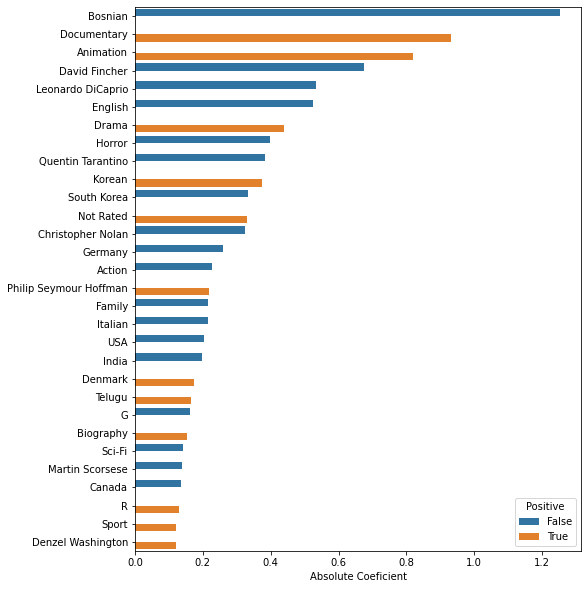

In [247]:
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_>0}, index=dfColumns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Lasso dropped {} of {} features.'.format(sum(coefs.coefs==0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(30) # 상위 30개 유의미한 변수
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title=('Lasso Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

In [248]:
# 상위 30개 유의미한 변수

top_coefs

,coefs,Positive,coefs_abs
Bosnian,-1.253023,False,1.253023
Documentary,0.930472,True,0.930472
Animation,0.820506,True,0.820506
David Fincher,-0.674526,False,0.674526
Leonardo DiCaprio,-0.534778,False,0.534778
English,-0.525534,False,0.525534
Drama,0.438476,True,0.438476
Horror,-0.398483,False,0.398483
Quentin Tarantino,-0.383778,False,0.383778
Korean,0.373406,True,0.373406


In [249]:
# Linear Regression

LR = linear_model.LinearRegression(n_jobs=-1)
acc_LR = test_model(LR, X_train, y_train)

LR_rsme = rsme(LR, X_train, y_train)

print('Score: {:.5f}'.format((acc_LR[0])))
print('RSME: {:.5f}'.format(LR_rsme.mean()))

Score: 0.48581
RSME: 0.75120


In [250]:
# Support Vector Regressor

svr_reg = SVR(kernel='rbf')
acc_SVR = test_model(svr_reg, X_train, y_train)

svr_rsme = rsme(svr_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_SVR[0])))
print('RSME: {:.5f}'.format(svr_rsme.mean()))

Score: 0.06344
RSME: 1.03076


In [251]:
#Decision Tree
dt_reg = DecisionTreeRegressor(random_state=21)
acc_tree = test_model(dt_reg, X_train, y_train)

dt_rsme = rsme(dt_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_tree[0])))
print('RSME: {:.5f}'.format(dt_rsme.mean()))

Score: 0.20375
RSME: 0.92808


In [252]:
# Random Forest
rf_reg = RandomForestRegressor(n_estimators = 1000, n_jobs=-1)
acc_rf = test_model(rf_reg, X_train, y_train)

rf_rsme = rsme(rf_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_rf[0])))
print('RSME: {:.5f}'.format(rf_rsme.mean()))

Score: 0.62090
RSME: 0.65336


In [253]:
# Bagging Regressor
br_reg = BaggingRegressor(n_estimators=1000, n_jobs=-1)
acc_br = test_model(br_reg, X_train, y_train)

br_rsme = rsme(br_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_br[0])))
print('RSME: {:.5f}'.format(br_rsme.mean()))

Score: 0.62137
RSME: 0.65398


In [254]:
# Gradient Boosting Regressor
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, loss='ls')
acc_gbr = test_model(gbr_reg, X_train, y_train)

gbr_rsme = rsme(gbr_reg, X_train, y_train)
print('Score: {:.5f}'.format((acc_gbr[0])))
print('RSME: {:.5f}'.format(gbr_rsme.mean()))

Score: 0.65141
RSME: 0.63582


In [255]:
# XGBoost

xgb_reg = xgb.XGBRegressor()

acc_xgb = test_model(xgb_reg, X_train, y_train)
xgb_rsme = rsme(xgb_reg, X_train, y_train)

print('Score: {:.5f}'.format((acc_xgb[0])))
print('RSME: {:.5f}'.format(xgb_rsme.mean()))

Score: 0.61712
RSME: 0.65692


In [275]:
# Ligth GBM

lgb_reg = LGBMRegressor()

acc_lgb = test_model(lgb_reg, X_train, y_train)
lgb_rsme = rsme(lgb_reg, X_train, y_train)

print('Score: {:.5f}'.format((acc_lgb[0])))
print('RSME: {:.5f}'.format(lgb_rsme.mean()))

Score: nan
RSME: nan


In [257]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regressor', 
              'Decision Tree', 'Random Forest', 'Bagging Regressor', 'Gradient Boosting Regressor ','XGBoost','Light GBM'],
    'Score': [acc_LR[0], acc_SVR[0], acc_tree[0], acc_rf[0], acc_br[0], acc_gbr[0], acc_xgb[0], acc_lgb[0]],
    'RMSE': [LR_rsme.mean(), svr_rsme.mean(), dt_rsme.mean(), rf_rsme.mean(), br_rsme.mean(), gbr_rsme.mean(), 
             xgb_rsme.mean(), lgb_rsme.mean()],
    'RMSE_std':[LR_rsme.std(), svr_rsme.std(), dt_rsme.std(), rf_rsme.std(), br_rsme.std(), gbr_rsme.std(), 
                xgb_rsme.std(), lgb_rsme.std()]
})

result = results.sort_values(by='RMSE', ascending=True)
result = result.set_index('Model')
display(result.head(9))

,Score,RMSE,RMSE_std
Model,,,
Gradient Boosting Regressor,0.651413,0.635816,0.034403
Random Forest,0.620905,0.653362,0.042601
Bagging Regressor,0.621374,0.653985,0.041778
XGBoost,0.617122,0.656922,0.051614
Linear Regression,0.485805,0.751200,0.034139
Decision Tree,0.203746,0.928077,0.063893
Support Vector Regressor,0.063435,1.030763,0.062206
Light GBM,NaN,NaN,NaN


# 6. 하이퍼파라미터 튜닝

## 6-1. 랜덤 포레스트 (RandomizedSearchCV)

In [266]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [267]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [268]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=90, min_samples_leaf=2, n_estimators=2000)

In [276]:
rf_best = RandomForestRegressor(max_depth=90, min_samples_leaf=2, n_estimators=2000, n_jobs=-1)

In [277]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=90, min_samples_leaf=2, n_estimators=2000,
                      n_jobs=-1)

In [278]:
acc_rf_best = test_model(rf_best, X_train, y_train)
rf_best_rsme = rsme(rf_best, X_train, y_train)

print('Score: {:.5f}'.format((acc_rf_best[0])))
print('RSME: {:.5f}'.format(rf_best_rsme.mean()))
print('RSME_std: {:.5f}'.format(rf_best_rsme.std()))

Score: 0.62828
RSME: 0.64990
RSME_std: 0.05750


# END